In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#for ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wine-quality-dataset/WineQT.csv


### Reading the Data :

In [3]:
df =pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
del df['Id']
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
903,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6
212,10.8,0.500,0.46,2.5,0.073,5.0,27.0,1.00010,3.05,0.64,9.5,5
502,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5
106,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,5
387,11.2,0.660,0.24,2.5,0.085,16.0,53.0,0.99930,3.06,0.72,11.0,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **Exploratory analysis**

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Distribution plot of all columns

In [7]:
def print_kdeplots(df):
        # Calculate the number of rows and columns for the subplots grid
        num_cols = 3  # You can change this value based on how many columns you want in each row
        num_rows = (len(df.columns) - 1) // num_cols + 1

        # Create a grid of subplots
        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))

        # Loop through each column and plot KDE
        for i, column in enumerate(df.columns):
            row_idx = i // num_cols
            col_idx = i % num_cols
            sns.kdeplot(df[column], shade=True, color='skyblue', ax=axes[row_idx, col_idx])
            axes[row_idx, col_idx].set_title(f'KDE Plot for {column}')
            axes[row_idx, col_idx].set_xlabel(column)
            axes[row_idx, col_idx].set_ylabel('Density')

        # Remove any empty subplots
        for i in range(len(df.columns), num_rows * num_cols):
            row_idx = i // num_cols
            col_idx = i % num_cols
            fig.delaxes(axes[row_idx, col_idx])

        plt.tight_layout()
        plt.show()


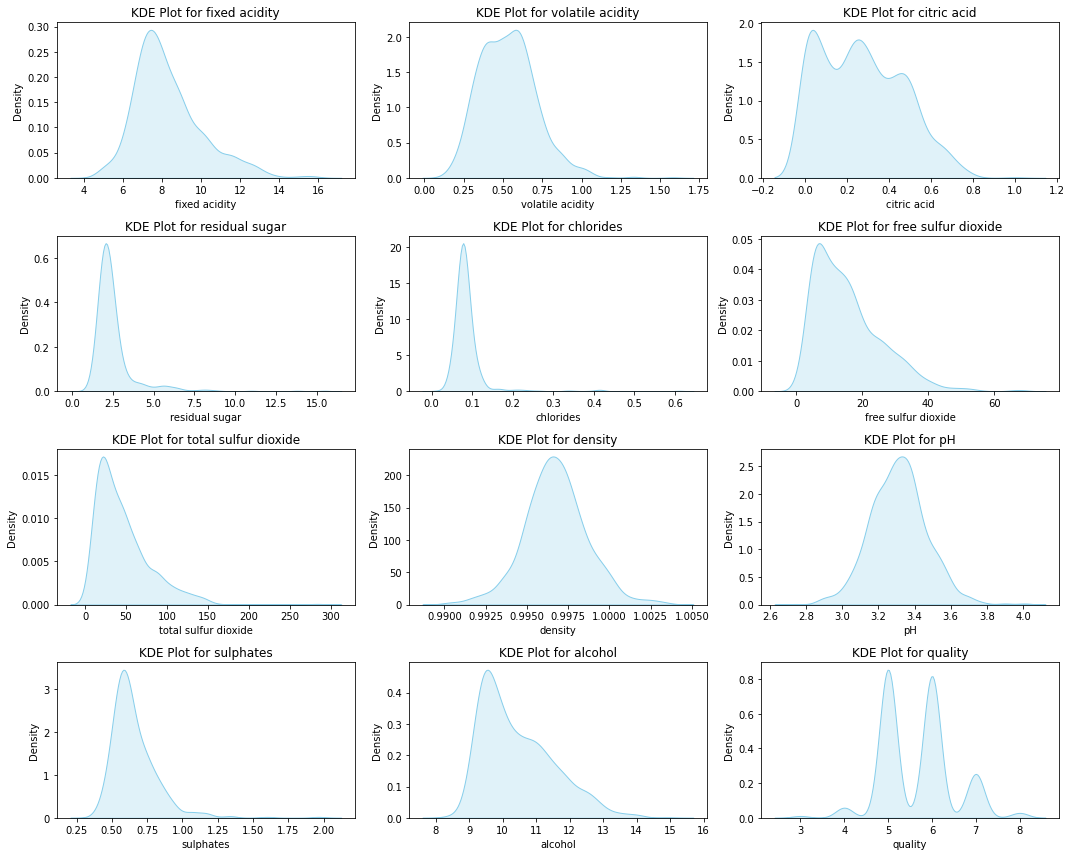

In [8]:
print_kdeplots(df)

## Plotting the scatterplots for all features against target coloumn

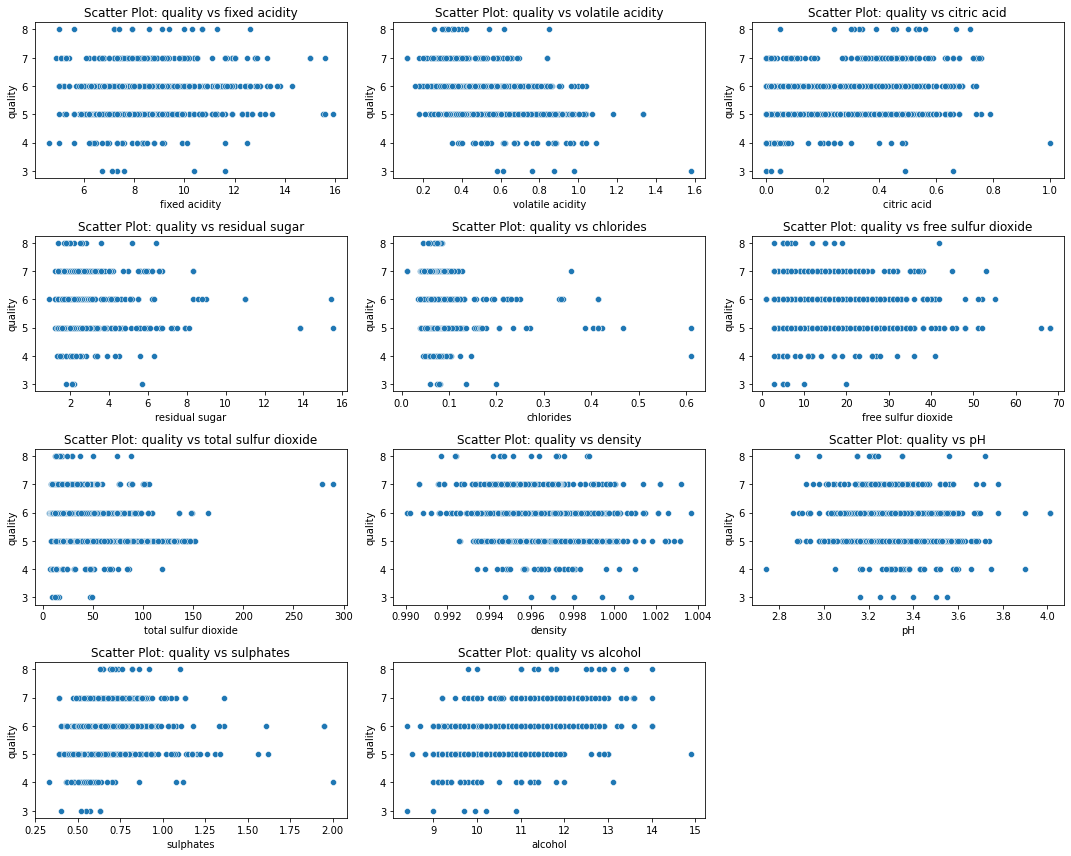

In [10]:

target_column_name = 'quality'

# Calculate the number of rows and columns for the subplots grid
num_cols = 3  # You can change this value based on how many columns you want in each row
num_rows = (len(df.columns) - 1) // num_cols + 1  # Subtract 1 for the target column

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))

# Loop through each feature column and plot scatter plot against the target
for i, column in enumerate(df.columns):
    if column == target_column_name:
        continue  # Skip the target column itself
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.scatterplot(x=column, y=target_column_name, data=df, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Scatter Plot: {target_column_name} vs {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel(target_column_name)

# Remove any empty subplots
for i in range(len(df.columns) - 1, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    if i >= len(df.columns) - 1:
        fig.delaxes(axes[row_idx, col_idx])


plt.tight_layout()
plt.show()

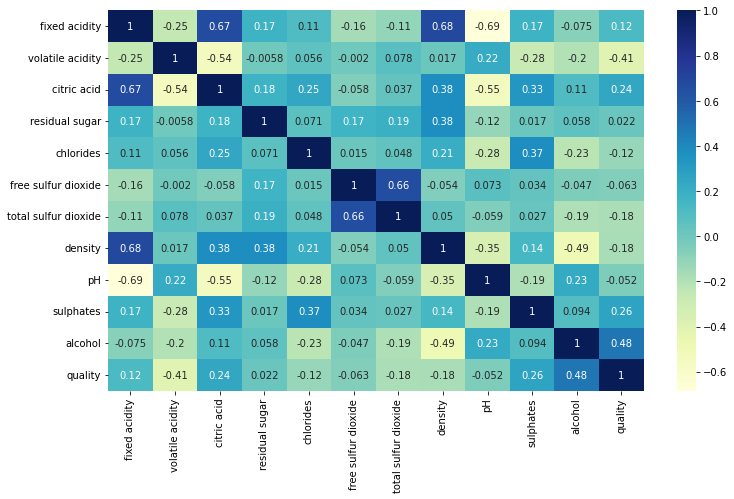

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

# Data Preprocessing

## Outlier Removal

In [13]:
df1 = df.copy()

In [14]:
#to get all column names
column_names_list = df.columns.tolist()
column_names_list.remove('quality')

#By analysing the distributions graph, these coloumns were not normally distributed
col_not_norm = ['citric acid', 'free sulfur dioxide', 'alcohol', 'volatile acidity']

#expression to get the normally distributed column names
#which is (column_names_list - col_not_norm)
set2 = set(col_not_norm)
col_norm = [item for item in column_names_list if item not in set2]

In [16]:
# 1 trimming for non_normal distribution
def trim_not_normal(list_not_normal,df):
    new_df = df.copy()
    for col in list_not_normal:    
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)
        iqr = percentile75 - percentile25

        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr

        new_df = new_df[(new_df[col] < upper_limit) & (new_df[col] > lower_limit)]
    return new_df

#1 trimming for normal distribution
def trim_normal(list_normal,df):
    new_df = df.copy()
    for col in list_normal:    
        
        upper_limit = df[col].mean() + 3 * df[col].std()
        lower_limit = df[col].mean() - 3 * df[col].std()

        new_df = new_df[(new_df[col] < upper_limit) & (new_df[col] > lower_limit)]
    
    return new_df

print('Shape of original data :',df1.shape)

df1 = trim_not_normal(col_not_norm, df1)
print('\n Shape of after removing outliers from non_normally distributed columns :',df1.shape)
df1 = trim_normal(col_norm, df1)
print('\n Shape of after removing outliers from normally distributed columns :',df1.shape)

Shape of original data : (1143, 12)

 Shape of after removing outliers from non_normally distributed columns : (1095, 12)

 Shape of after removing outliers from normally distributed columns : (1008, 12)


## Train-Test Split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(df1.drop('quality',axis=1),df1['quality'],test_size=0.2,random_state=42)

## Feature scaling using MinMaxScaler

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler_std = StandardScaler()
# xtrain_std_tr = scaler_std.fit_transform(xtrain)
# xtest_std_tr = scaler_std.transform(xtest)

scaler_minmax = MinMaxScaler()
xtrain_norm_tr = scaler_minmax.fit_transform(xtrain)
xtest_norm_tr = scaler_minmax.transform(xtest)

In [20]:
pd.DataFrame(xtrain_norm_tr).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.00000,806.000000
mean,0.378737,0.458826,0.324779,0.241574,0.245848,0.341594,0.269745,0.443002,0.516616,0.38781,0.395699
std,0.194325,0.188634,0.239396,0.162385,0.114125,0.218692,0.207344,0.173029,0.170880,0.15925,0.199107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.238095,0.312147,0.101266,0.145833,0.181818,0.150000,0.111111,0.329949,0.392857,0.27500,0.220000
50%,0.333333,0.463277,0.303797,0.208333,0.232955,0.300000,0.214815,0.437056,0.523810,0.36250,0.340000
75%,0.464286,0.587571,0.506329,0.291667,0.289773,0.468750,0.368519,0.553046,0.619048,0.47500,0.520000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


### Preparing for Models 

In [23]:
model_comp={}

### 1.Logistic Regression

In [24]:
lgr=LogisticRegression()
lgr.fit(xtrain_norm_tr,ytrain)
y1=lgr.predict(xtest_norm_tr)
print(accuracy_score(ytest,y1))
print(f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

0.599009900990099
0.5721642089464651
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.77      0.70        77
           6       0.58      0.63      0.60        89
           7       0.43      0.22      0.29        27
           8       0.00      0.00      0.00         3

    accuracy                           0.60       202
   macro avg       0.33      0.32      0.32       202
weighted avg       0.56      0.60      0.57       202



### 2. Decision Tree 

In [25]:
dt=DecisionTreeClassifier()
dt.fit(xtrain_norm_tr,ytrain)
y2=dt.predict(xtest_norm_tr)

print(accuracy_score(ytest,y2))
print(f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

0.6138613861386139
0.6049531084330152
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.65      0.77      0.70        77
           6       0.65      0.60      0.62        89
           7       0.44      0.41      0.42        27
           8       0.50      0.33      0.40         3

    accuracy                           0.61       202
   macro avg       0.37      0.35      0.36       202
weighted avg       0.60      0.61      0.60       202



###  3 RandomForest

In [26]:
rf=RandomForestClassifier()
rf.fit(xtrain_norm_tr,ytrain)
y3=rf.predict(xtest_norm_tr)

print(accuracy_score(ytest,y3))
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

0.6188118811881188
0.6010612308705018
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.77      0.70        77
           6       0.61      0.62      0.61        89
           7       0.55      0.41      0.47        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       202
   macro avg       0.36      0.36      0.36       202
weighted avg       0.59      0.62      0.60       202



### 4 KNN

In [27]:
k=KNeighborsClassifier()
k.fit(xtrain_norm_tr,ytrain)
y4=k.predict(xtest_norm_tr)

print(accuracy_score(ytest,y4))
print(f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

0.5643564356435643
0.545967141624342
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.59      0.69      0.63        77
           6       0.58      0.60      0.59        89
           7       0.38      0.30      0.33        27
           8       0.00      0.00      0.00         3

    accuracy                           0.56       202
   macro avg       0.31      0.32      0.31       202
weighted avg       0.53      0.56      0.55       202



### 5 SVC 

In [28]:
s=SVC()
s.fit(xtrain_norm_tr,ytrain)
y5=s.predict(xtest_norm_tr)

print(accuracy_score(ytest,y5))
print(f1_score(ytest,y5,average='weighted'))
print(classification_report(ytest,y5))

model_comp['svc']=[accuracy_score(y5,ytest),f1_score(ytest,y5,average='weighted')]

0.6188118811881188
0.5929863953722361
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.78      0.71        77
           6       0.61      0.65      0.63        89
           7       0.47      0.26      0.33        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       202
   macro avg       0.35      0.34      0.33       202
weighted avg       0.58      0.62      0.59       202



### Model Comparison 
### accuracy and f1 scores of all applied models are given below 

In [29]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Greens')

,Accuracy,F1_score
KNN,0.564356,0.545967
logistic regression,0.599010,0.572164
svc,0.618812,0.592986
Random forest,0.618812,0.601061
decision tree,0.613861,0.604953
